In [ ]:
import numpy as np
from sympy.solvers import solve
from sympy import Symbol
import matplotlib.pyplot as plt
import math
import scipy.misc as sc
import seaborn as sns


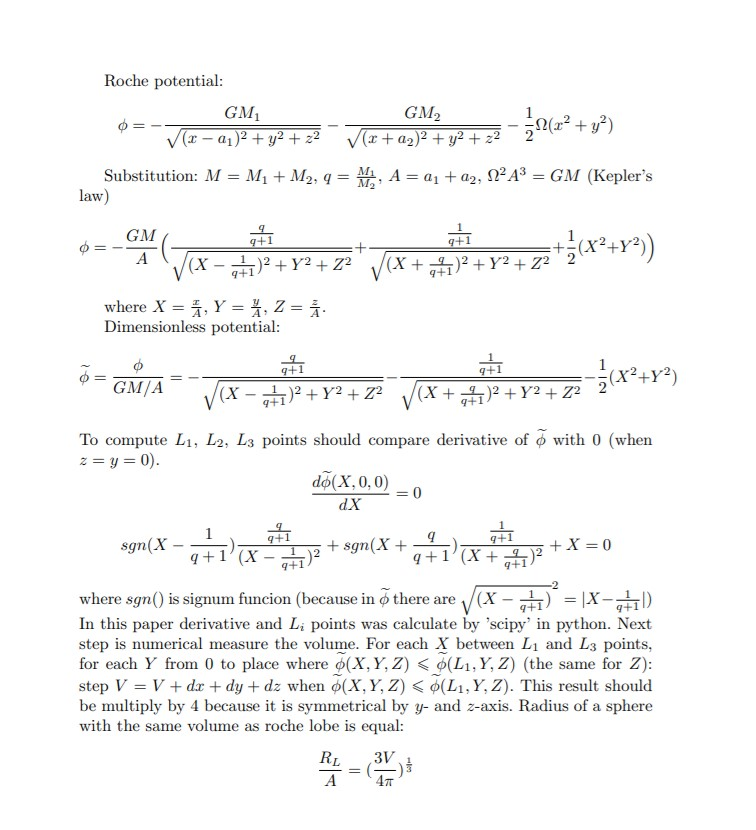

## Let q be mass ratio of the binary system for cygnus X-1 which is approximately ~14:19 (solar masses) which is 0.73684210526

In [ ]:
Q = np.linspace(0.1, 0.2,10) #ratio is increasing
#Q = [0.7]
q = 0.73684210526
for q in Q:
	def PHI(x,y,z):
		phi1 = -1.*q/(q+1.)/np.sqrt((x-1./(q+1.))**2+y**2+z**2)
		phi2 = -1./(q+1.)/np.sqrt((x+q/(q+1.))**2+y**2+z**2)
		phi3 = 0.5*(x**2+y**2)
		return (phi1 + phi2 - phi3)

	def PHI_X(x):
		z= 0.0
		y = 0.0
		phi1 = -1.*q/(q+1.)/np.sqrt((x-1./(q+1.))**2+y**2+z**2)
		phi2 = -1./(q+1.)/np.sqrt((x+q/(q+1.))**2+y**2+z**2)
		phi3 = 0.5*(x**2+y**2)
		return (phi1 + phi2 - phi3)


	def testL(x,tabL):
		for l in tabL:
			if np.abs(l-x) < 0.1:
				return False
		return True


	tabL = []
	x = -3
	dx = 0.001
	l = 0
	while x < 3:

		if np.abs(sc.derivative(PHI_X, x,dx=0.0001))<0.01 and testL(x,tabL):# and x+0.001 not in tabL and x-0.001 not in tabL and x-0.002 not in tabL and x+0.002 not in tabL:
			#print x, sc.derivative(PHI_X, x,dx=0.0001), l
			l = l+1
			tabL.append(x)
		x = x + dx

	L2 = tabL[0]
	L1 = tabL[1]
	L3 = tabL[2]
	PHI_RL = PHI_X(L1)


## Potential vs Distance graph

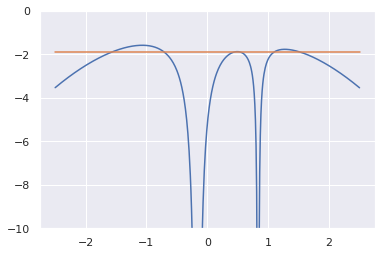

In [ ]:
	tabx = []
	taby = []
	tabc = []
	x= -2.5
	dx = 0.01
	while x < 2.5:
		tabx.append(x)
		taby.append(PHI_X(x))
		tabc.append(PHI_X(L1))
		x = x + dx
	plt.plot(tabx,taby)
	plt.plot(tabx,tabc)
	plt.ylim(-10,0)
	
	plt.show()
	

In [ ]:
x = L1
y = 0.
z = 0.
dx = 0.005
dy = 0.005
dz = 0.005
V = 0.0


while x < L3:
	while (PHI(x,y,z) < PHI_RL):# and (PHI(x,y,z) < PHI(x,y+dy,z)): 
		while  (PHI(x,y,z) < PHI_RL):# and (PHI(x,y,z) < PHI(x,y,z+dz)):
			if (PHI(x,y,z) < PHI_RL):
				V = V + dx*dy*dz
	      #y = y + dy
		y = 0.
		z = z + dz
	z = 0.
	y = 0.
	x = x + dx
	x = L3
	y = 0.
	z = 0.

	while x > L1:
		while y<0.5 and (PHI(x,y,z) < PHI_RL):#(PHI(x,y,z) < PHI_RL) and (x**2+y**2+z**2)**0.5 < max(-L2,L3):
			while z<0.5 and (PHI(x,y,z) < PHI_RL):# (PHI(x,y,z) < PHI_RL) and (x**2+y**2+z**2)**0.5 < max(-L2,L3):
				V = V + dx*dy*dz
				z = z + dz
			z = 0.
			y = y + dy
		z = 0.
		y = 0.
		x = x - dx

	print (q, (3.*V/np.pi)**(1./3.))
	

0.2 0.2533508123084007


KeyboardInterrupt: ignored

In [ ]:
sns.set()

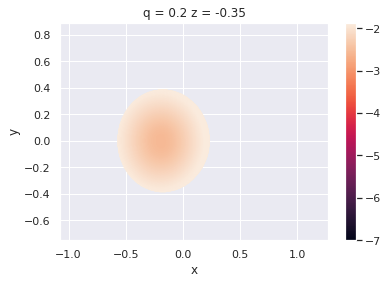

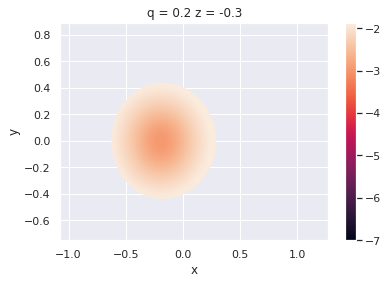

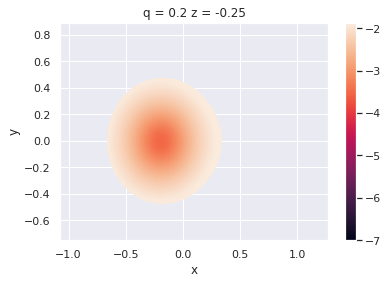

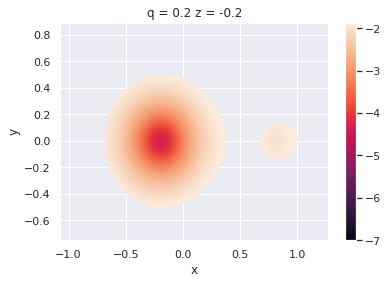

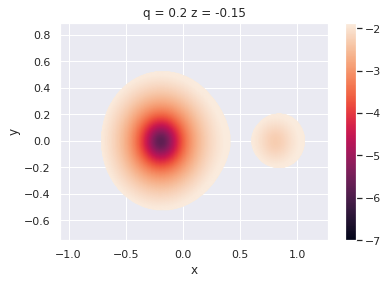

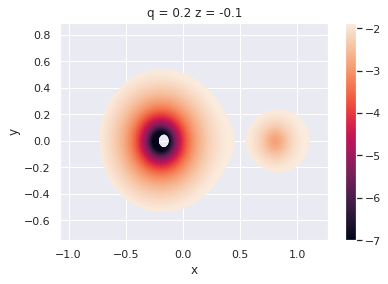

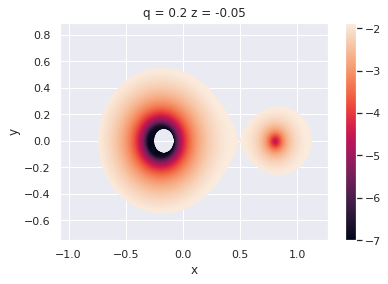

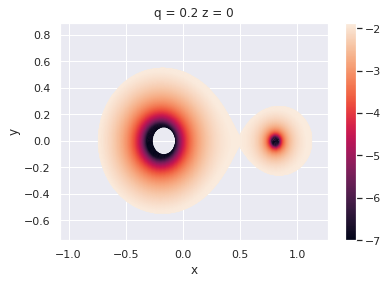

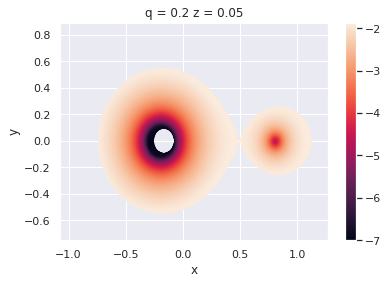

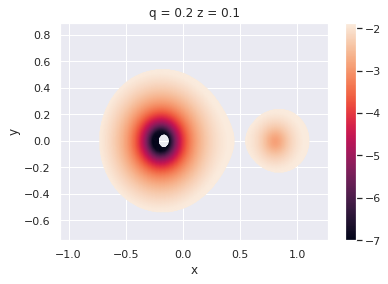

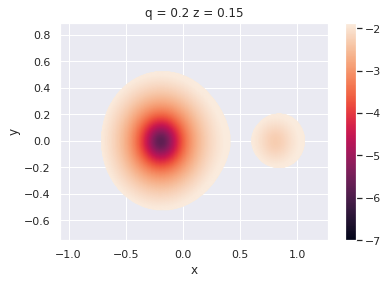

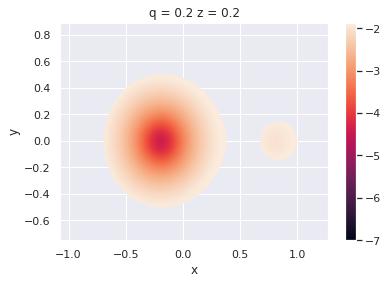

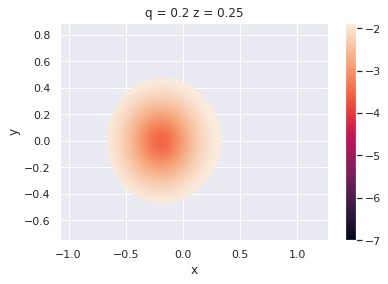

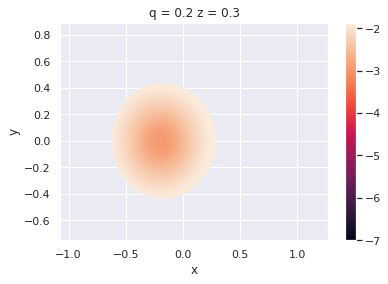

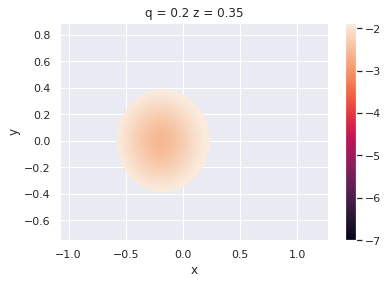

In [ ]:
n = 1
for z in [-0.35,-0.3,-0.25,-0.2,-0.15,-0.1,-0.05,0,0.05,0.1,0.15,0.2,0.25,0.3,0.35]:
		x = L2
		y = 0.7*L2
		dx = 0.005
		dy = 0.005

		tabx = []
		taby = []
		tabc = []

		while x < L3:
			while y < 0.7*L3:
				if PHI(x,y,z) > -7 and PHI(x,y,z)< PHI_RL:
					tabx.append(x)
					taby.append(y)
					tabc.append(PHI(x,y,z))
				y = y + dy
			y = 0.7*L2
			x = x + dx

		plt.clf()
		plt.scatter(tabx, taby, c=tabc,lw = 0)
		plt.title("q = "+str(q)+" z = "+str(z))
		plt.xlabel("x")
		plt.ylabel("y")
		plt.xlim(L2,L3)
		plt.clim(-7,PHI_RL)
		plt.ylim(0.7*L2,0.7*L3)
		plt.colorbar()
		nStr=str(n)
		nStr=nStr.rjust(5,'0')
		plt.savefig('img'+nStr+'.png')
		n = n + 1
		plt.show()
	


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter

fig = plt.figure()

def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
for i in range(20):
    x += np.pi / 15.
    y += np.pi / 20.
    im = plt.imshow(f(x, y))
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=500)

writer = PillowWriter(fps=20)
ani.save("demo2.gif", writer=writer)

plt.show()


<IPython.core.display.Javascript object>